In [7]:
#画像認識演習問題
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.utils import to_categorical
from keras.layers import Dropout
import os

In [8]:
#画像ファイル名の読み込み
path_helthy = 'data/images/COVID-NORMAL/healthy'
list_helthy = [helthy for helthy in os.listdir(path_helthy) if not helthy.startswith('.') ]
path_covid = 'data/images/COVID-NORMAL/covid19'
list_covid= [covid for covid in os.listdir(path_covid) if  not covid.startswith('.')]

print(len(list_covid))
print(len(list_helthy))


116
116


In [9]:
#画像格納用配列の作成
num_covid = len(list_covid)
num_helthy = len(list_helthy)
num_all = num_covid + num_helthy

img_array = np.zeros((num_all,64,64,1),dtype=float)
labels_arry = np.zeros((num_all,1),dtype=int)

In [10]:
#健康画像の読み込み ラベル0
for num in range(num_helthy):
    file = f'{path_helthy}/{list_helthy[num]}'
    img_array[num] = img_to_array(
        load_img(
            file,
            color_mode='grayscale',
            target_size=(64,64),
            interpolation='lanczos'
        )
    )/255
    labels_arry[num] = 0
#COVID画像の読み込み ラベル1

for num in range(num_covid):
    file = f'{path_covid}/{list_covid[num]}'
    img_array[num+num_helthy] = img_to_array(
        load_img(
            file,
            color_mode='grayscale',
            target_size=(64,64),
            interpolation='lanczos'
        )
    )/255
    labels_arry[num+ num_helthy] = 1
    
#順番のシャッフル
key = np.arange(num_all)
np.random.seed(111)
np.random.shuffle(key)
x_train = img_array[key]
y_train = labels_arry[key]

In [11]:
#ニューラルネットモデルの実装
model = Sequential()
model.add(Flatten(input_shape=(64,64,1)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,271,201 (8.66 MB)

 Trainable params: 2,271,201 (8.66 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
result = model.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=16,
    validation_split=0.15,
)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4569 - loss: 2.0209 - val_accuracy: 0.4571 - val_loss: 0.8173
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5533 - loss: 1.8556 - val_accuracy: 0.5714 - val_loss: 0.6889
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5228 - loss: 1.7849 - val_accuracy: 0.4571 - val_loss: 0.6943
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5787 - loss: 1.1732 - val_accuracy: 0.5429 - val_loss: 0.6949
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4873 - loss: 1.4623 - val_accuracy: 0.5429 - val_loss: 0.6870
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4569 - loss: 1.3707 - val_accuracy: 0.5429 - val_loss: 0.6870
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4518 - loss: 1.1662 - val_accuracy: 0.5429 - val_loss: 0.6898
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5127 - loss: 0.9549 - val_accuracy: 0.

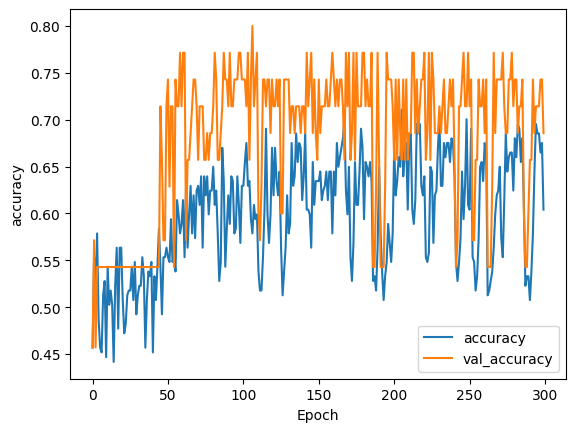

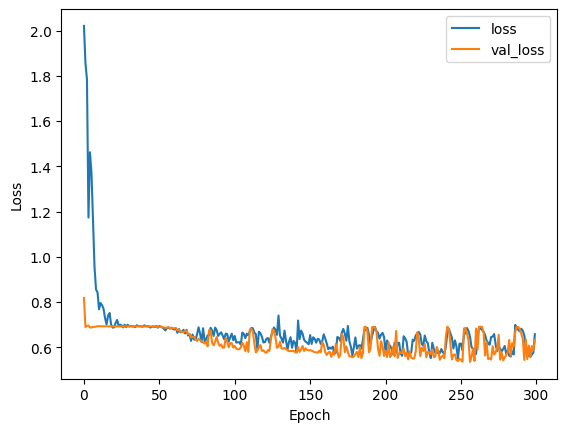

In [13]:
#正解率検査
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#未知画像で予測の実行
img1 = img_to_array(load_img(
    'data/images/covid.jpg',
    color_mode='grayscale',
    target_size=(64,64)))/255
img2 = img_to_array(load_img(
    'data/images/NORMAL.jpg',
    color_mode='grayscale',
    target_size=(64,64)))/255

#予測用配列作成
x_pred = np.zeros((2,64,64,1))
x_pred[0] = img1
x_pred[1] = img2
pred = model.predict(x_pred)
for i in range(len(pred)):
    if pred[i] < 0.5:
        print(f'画像{i+1}は正常画像です。確率:{1 - pred[i][0]:.2f}')
    else:
        print(f'画像{i+1}はCOVID-19画像です。確率:{pred[i][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
画像1はCOVID-19画像です。確率:0.67
画像2は正常画像です。確率:0.56
